Setup Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from collections import OrderedDict
import h5py
import importlib
DataDir = '/nfs/Data/Proteasome Project Data'
import sys
sys.path.append(DataDir)
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import MPLGUI as MP
%matplotlib inline
import matplotlib._pylab_helpers
def ClearAllFigs():
    figures=[manager.canvas.figure for manager in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    print figures
    for figure in figures:
        MP.mpl.close(figure)

In [3]:
from wand.image import Image as WImage
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

Import Data Function

In [4]:
N = 1
def ChangeDS(NewWorkingName):
    global N
    global WorkingName
    global FullOutArray
    global Errors
    global HasData
    global Runtimes
    global A0Range
    global KD1Range
    global KD2Range
    global Kp
    global TimePoints
    global SpeciesCount
    global Delta
    global Deg
    
    WorkingName = NewWorkingName
    
    try:
        del FullOutArray
    except:
        pass

    File = h5py.File("{}/{}{}.h5".format(DataDir, N, WorkingName), "r")
    if N == 1:
        CD = importlib.import_module("{}{}".format("",WorkingName))
    else:
        CD = importlib.import_module("{}{}".format(N-1,WorkingName))

    FullOutArray = File["Results"][:]
    FullOutArray = FullOutArray[::-1,::-1,:,:,:]


    Errors = File["Errors"][:]
    HasData = File["HasData"][:]
    Runtimes = File["Runtimes"][:]
    A0Range = File["A0Range"][:]
    Delta = CD.Delta
    Deg = Delta

    KD1Range = File["KD1Range"][:]
    KD1Range = KD1Range[::-1]

    KD2Range = File["KD2Range"][:]
    KD2Range = KD2Range[::-1]

    Kp = File["Kp"][()]
    TimePoints = CD.KeepTimePoints
    SpeciesCount = CD.SpeciesCount
    print "Working Name: {}".format(WorkingName)
    print "Shape: {}".format(Errors.shape)
    print "Errors: {}".format(np.sum(Errors==True))
    print "HasData: {}".format(np.sum(HasData==True))

In [5]:
import os, fnmatch
DataSets = []
listOfFiles = os.listdir(DataDir)
pattern = "STV3*.py"
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        DataSets.append(entry[:-3])
print (DataSets)

['STV3SynDeg17e-05T', 'STV3SynDeg28e-04T', 'STV3SynDeg10e-09T', 'STV3StaticT', 'STV3SynDeg32e-08T', 'STV3SynDeg10e-16T', 'STV3SynDeg10e-11T', 'STV3SynDeg11e-06T', 'STV3SynDeg27e-07T', 'STV3SynDeg43e-06T', 'STV3SynDeg35e-05T', 'STV3SynDeg10e-10T', 'STV3SynDeg22e-06T', 'STV3SynDeg87e-06T', 'STV3SynDeg10e-14T', 'STV3SynDeg10e-13T', 'STV3SynDeg10e-12T', 'STV3SynDeg54e-07T', 'STV3SynDeg10e-15T', 'STV3SynDeg69e-05T', 'STV3SynDeg56e-04T', 'STV3SynDeg14e-04T']


Choose Data Set:

In [6]:
DSName = "STV2StaticT"
# DSName = "STV2SynDeg28e-04T"
ChangeDS(DSName)
# ChangeDS("STV2SynDeg28e-04T")
if "Static" in DSName:
    CDataSet = "in vitro-like"
else:
    CDataSet = "in vivo-like"

Working Name: STV2StaticT
Shape: (100, 100)
Errors: 7
HasData: 1344000000


In [7]:
# ColorList = {
#     "SW":"#d7191c",
#     "WW":"#fdae61",
#     "SS":"#ffffbf",
#     "WS":"#abd9e9",
#     "M":"#2c7bb6",
# }
# ColorList = {
#     "SW":"#ca0020",
#     "WW":"#f4a582",
#     "SS":"#f7f7f7",
#     "WS":"#92c5de",
#     "M":"#0571b0",
# }
# ColorList = {
#     "SW":"",
#     "WW":"",
#     "SS":"",
#     "WS":"",
#     "M":"",
# }
ColorList = {
    "SW":"#e41a1c",
    "WW":"#377eb8",
    "SS":"#4daf4a",
    "WS":"#984ea3",
    "M":"#ff7f00",
}
# ColorList = {
#     "SW":"#ca0020",
#     "WW":"#f4a582",
#     "SS":"#f7f7f7",
#     "WS":"#92c5de",
#     "M":"#0571b0",
# }

In [8]:
# DataLocations = {
#     "SW":(np.min(KD1Range), np.max(KD2Range)),
#     "WW":(np.max(KD1Range), np.max(KD2Range)),
#     "SS":(np.min(KD1Range), np.min(KD2Range)),
#     "WS":(np.max(KD1Range), np.min(KD2Range)),
#     "M":(KD1Range[55], KD2Range[55]),
# }

Strong = 0
Weak = -1

DataIndices = {
    "SW":(Strong, Weak),
    "WW":(Strong, Strong),
    "SS":(Weak, Weak),
    "WS":(Weak, Strong),
    "M":(55, 55),
}
DataLocations = {
    "SW":(KD1Range[DataIndices["SW"][0]], KD2Range[DataIndices["SW"][1]]),
    "WW":(KD1Range[DataIndices["WW"][0]], KD2Range[DataIndices["WW"][1]]),
    "SS":(KD1Range[DataIndices["SS"][0]], KD2Range[DataIndices["SS"][1]]),
    "WS":(KD1Range[DataIndices["WS"][0]], KD2Range[DataIndices["WS"][1]]),
    "M":(KD1Range[DataIndices["M"][0]], KD2Range[DataIndices["M"][1]]),
}

DataNames = {x:map("{:.0e}".format,y) for (x,y) in DataLocations.items()}

In [9]:
TimePoints[:52]

array([  1.00000000e-03,   1.41747416e-03,   2.00923300e-03,
         2.84803587e-03,   4.03701726e-03,   5.72236766e-03,
         8.11130831e-03,   1.00000000e-02,   1.14975700e-02,
         1.62975083e-02,   2.31012970e-02,   3.27454916e-02,
         4.64158883e-02,   6.57933225e-02,   9.32603347e-02,
         1.00000000e-01,   1.32194115e-01,   1.87381742e-01,
         2.65608778e-01,   3.76493581e-01,   5.33669923e-01,
         7.56463328e-01,   1.00000000e+00,   1.07226722e+00,
         1.51991108e+00,   2.15443469e+00,   3.05385551e+00,
         4.32876128e+00,   6.13590727e+00,   8.69749003e+00,
         1.00000000e+01,   1.23284674e+01,   1.74752840e+01,
         2.47707636e+01,   3.51119173e+01,   4.97702356e+01,
         7.05480231e+01,   1.00000000e+02,   1.41747416e+02,
         2.00923300e+02,   2.84803587e+02,   4.03701726e+02,
         5.72236766e+02,   8.11130831e+02,   1.00000000e+03,
         1.14975700e+03,   1.62975083e+03,   2.31012970e+03,
         3.27454916e+03,

In [10]:
# Add Binary Asm Pathways

import AsmPathsBinary as AB
D, SortedPathways = AB.AsmPathways()
P = AB.Probabilities(D) 
# -----------------------------------------------------------------------------------------
def find_nearest(a, a0, return_idx = False):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    if return_idx:
        return idx
    return a.flat[idx]

Params

In [11]:
ShowPlots = True

Settings = {"hpad": 0.3, "wpad": 0.3, "FontSize": 11, "ShowNormLine":False}
gs1 = gridspec.GridSpec(nrows=3, ncols=2)#, left=0.05, right=0.48, wspace=0.05)

A0 = 4.0e-6
# A0 = 2.0e-6
# A0 = 1.0e-8
# Time = 1.0e8
Time = 3600*24 # One Day

# Setup Initial Derived Values
TimeTarget = find_nearest(TimePoints, Time, return_idx=True)
A0Target = find_nearest(A0Range, A0, return_idx=True)
A0 = A0Range[A0Target]
Time = TimePoints[TimeTarget]
print Time
print A0

75646.3327555
4.32876128108e-06


In [12]:
np.save("./FigureData/Contour-Data-{}.npy".format(CDataSet),FullOutArray[:,:,A0Target,TimeTarget,11].T)

In [13]:
if len(A0Range) > 5:
    A0Start = np.argmax(A0Range > 1e-9)-1
    A0Stop = np.argmax(A0Range > 1e-5)
else:
    A0Start = 0
    A0Stop = len(A0Range)

ConcRange = A0Range[A0Start:A0Stop]

FinalFlux = np.zeros(len(SortedPathways.values()))
Flux3D = np.zeros([len(ConcRange),len(SortedPathways.values())])

def AddLineFracVs(
                MainPlot,
                PlotIndex,
                DataSet,
                Width = MP.inches2mm(3.25),
                FontSize = 5.5,
                Aspect= 4.0/3.0,
                hpad=0.2,
                wpad=0.40,
                ShiftRight = 0.0,
                TimeOrConc = "Conc", # "Conc" or "Time"
            ):

In [14]:
# from MPLGUI import ContourPlot
import MPLGUI as MP
import matplotlib.gridspec as gridspec
__author__ = 'Koan'

def AddLineFracVs(
                MainPlot,
                PlotIndex,
                DataSet,
                Width = MP.inches2mm(3.25),
                FontSize = 5.5,
                Aspect= 4.0/3.0,
                hpad=0.2,
                wpad=0.40,
                ShiftRight = 0.0,
                TimeOrConc = "Conc", # "Conc" or "Time"
                *args,
                **kwargs
            ):
#     import numpy as np
#     import MPLGUI as MP
#     from matplotlib.offsetbox import AnnotationBbox, OffsetImage

#     YAxis = FullOutArray[::-1,::-1,:,:,11]
    YAxis = FullOutArray[:,:,:,:,11]
    XMin = 0.0
    XMax = 0.0
    YMin = 0.0
    YMax = 0.0
    LineSet=[]
    for DataSet, Key in DataIndices.items():
        if TimeOrConc == "Conc":
            TitleText = "Initial Monomer Concentration (M)"
            CData = YAxis[Key[0],Key[1],:, TimeTarget]
            XAxis = A0Range
            if np.max(CData) > YMax:
                YMax = np.max(CData)
            if np.max(CData) < YMin:
                YMin = np.min(CData)

        elif TimeOrConc == "Time":
            TitleText = "Time (s)"
            CData = YAxis[Key[0],Key[1],A0Target, :]
            XAxis = TimePoints
            if np.max(CData) > YMax:
                YMax = np.max(CData)
            if np.max(CData) < YMin:
                YMin = np.min(CData)
        LineSet.append((DataSet, CData))
        
    XLim = [np.min(XAxis),np.max(XAxis)]

    if MainPlot:
        MF = MainPlot._MainFig
    else:
        MF = MainPlot
    
    MainPlot = MP.LinePlot(
        YAxisInPercent = False,
        Width=Width,
        PrimaryFig=MF,
        subplot=PlotIndex,
        Aspect=Aspect,
        hpad = hpad,
        wpad = wpad,
#         axes_aspect=axes_aspect,
    )
    

    for Line in LineSet:
        MainPlot.AddLine(
            XAxis,
            Line[1],
            xlog = True,
            label=Line[0],
            color=ColorList[Line[0]],
            linewidth=3,
            alpha=0.8,
#             rasterized=True,
        )
#     MainPlot.AddLegend()

    MainPlot._Plot.tick_params(
            which = 'major',
            labelsize=FontSize*0.8,
            pad = 1.5, # How far are the labels from the mark
    )

    MainPlot.XLabel(TitleText)
    MainPlot.YLabel("Yield of Maximal Structure")
#     MainPlot.SetXRange(XMin,XMax)
    MainPlot.SetYRange(YMin,YMax*1.05)

#         MainPlot.SaveFig(ImgFileName, bbox_inches = 'tight', antialiased=True)
#         MP.OpenPDF(ImgFileName)
#     l,b,w,h = MainPlot.gca().get_position().bounds

#     print plt.gca().get_position().bounds
# #         ll,bb,ww,hh = Colorbar.ax.get_position().bounds
#     print Colorbar.ax.get_position().bounds
# #         Colorbar.ax.set_position([ll, b+0.1*h, ww, h*0.8])
#     Colorbar.ax.set_position(np.array(Colorbar.ax.get_position().bounds) + [ShiftRight,0.0,0,0])
#     MainPlot._Plot.set_position(np.array(MainPlot._Plot.get_position().bounds) + [ShiftRight,0.0,0,0])

    MainPlot._Plot.set_title(CDataSet, style='italic')
    XTicks = MainPlot._Plot.xaxis.get_major_ticks()
    for Index in np.arange(0, len(XTicks),2):
        XTicks[Index].label1On = ""
        

#     MainPlot._Plot.set_position(np.array(MainPlot._Plot.get_position().bounds) + [ShiftRight,0.0,-0.05,0.0])
    MainPlot._Plot.set_position(np.array(MainPlot._Plot.get_position().bounds) + [ShiftRight,0.0,0.0,0.0])
   
    print "Done"
    return MainPlot

def AddContour(
                MainPlot,
                PlotIndex,
                DataSet,
                Width = MP.inches2mm(3.25),
                FontSize = 5.5,
                Aspect=1.0,
                hpad=0.3,
                wpad=0.3,
                axes_aspect="equal",
                ShiftRight = 0.0,
                ColorMarkers = True,
            ):

In [15]:
# from MPLGUI import ContourPlot
import MPLGUI as MP

__author__ = 'Koan'

def AddContour(
                MainPlot,
                PlotIndex,
                DataSet,
                Width = MP.inches2mm(3.25),
                FontSize = 5.5,
                Aspect=1.0,
                hpad=0.3,
                wpad=0.3,
                axes_aspect="equal",
                ShiftRight = 0.0,
                ColorMarkers = True,
                *args,
                **kwargs
            ):
    import numpy as np
    import MPLGUI as MP
    from matplotlib.offsetbox import AnnotationBbox, OffsetImage

    Images = MP.ImportImages()
    
    IP = False
    InVivo = False
    ContourData = FullOutArray[:,:,A0Target,TimeTarget,11].T
#     ContourData = FullOutArray[:,:,A0Target,TimeTarget,11]

#     KD1Range = np.load("{}/{}".format(MP.DefaultDataDir, "KDRange.npy"))
#     KD2Range = np.load("{}/{}".format(MP.DefaultDataDir, "KDRange.npy"))

    XLim = [np.max(KD1Range),np.min(KD1Range)]
    YLim = [np.max(KD2Range),np.min(KD2Range)]

    XBounds = (XLim[0] <= KD1Range) & (KD1Range<= XLim[1])
    XBounds = (YLim[0] <= KD2Range) & (KD2Range<= YLim[1])

    if MainPlot:
        MF = MainPlot._MainFig
    else:
        MF = MainPlot

    MainPlot = MP.ContourPlot(
        Width=Width,
        PrimaryFig=MF,
        subplot=PlotIndex,
        Aspect=Aspect,
        hpad = hpad,
        wpad = wpad,
        axes_aspect=axes_aspect,
    )
    """
    gs = gridspec.GridSpec(3,2)
    global T1
    T1 = gs
    global T2
    ll,bb,ww,hh = gs.get_position().bounds
    CB.ax.set_position([ll, bb, ww, hh])
#     MainPlot._Plot.set_position(gs[0:2].get_position(MainPlot._MainFig))
#     MainPlot._Plot.set_subplotspec(gs[0:2]) 
    """

    XTicks = MainPlot._Plot.xaxis.get_major_ticks()
    YTicks = MainPlot._Plot.yaxis.get_major_ticks()
    for Index in np.arange(0, len(XTicks),2):
        XTicks[Index].label1On = ""
        YTicks[Index].label1On = ""

    import matplotlib.cm as cm
    
#     ColorMap = cm.gray_r
#     ColorMap = cm.gray
    ColorMap = cm.binary
#     ColorMap = cm.plasma_r
    
    ContourImage = MainPlot._Plot.pcolormesh(
        KD1Range,
        KD2Range,
        ContourData,
        cmap=ColorMap,
        shading="gouraud",
        # vmin=0.0,
        # vmax=1.0,
    )
    ContourImage.autoscale()
    ZLim = [np.min(ContourData), np.max(ContourData)]
#         ZLim = [0.0,1.0]
    Delta = ZLim[1] - ZLim[0]
    ContourLevels = [
            ZLim[0]+1.0*Delta/5.0,
            ZLim[0]+2.0*Delta/5.0,
            ZLim[0]+3.0*Delta/5.0,
            ZLim[0]+4.0*Delta/5.0,
    ]

    if DataSet == "in vivo-like":
        ContourLevels = [
                ZLim[0]+1.0*Delta/5.0,
                ZLim[0]+2.0*Delta/5.0,
                ZLim[0]+3.0*Delta/5.0,
                ZLim[0]+4.0*Delta/5.0,
                0.97,
                0.975,
                0.98
                ]
# #             ContourLevels = [
# #                     0.40,
# #                     0.60,
# #                     0.63,
# #                     0.65,
# #                     ]
#         elif DataSet == "In Vitro":
#             ContourLevels = [
#                     0.50,
#                     0.59,
#                     0.75,
#                     0.99,
#                     ]
    print ZLim
    print ContourLevels
    CLs = MainPlot._Plot.contour(
        KD1Range,
        KD2Range,
        ContourData,
        ContourLevels,
        origin='lower',
        linewidths=2.0,
        colors=(
            'red',
            'blue',
            'green',
            'purple',
        )
    )
    if ContourLevels[-1] > 0.95 and ContourLevels[-2] < 0.92 or ContourLevels[-1] > 0.975:
        ContourLevels = ContourLevels[:-1]
    Colorbar = MP.mpl.colorbar(
            ContourImage,
            #     ticklocation = [],
            ticks = [ZLim[0],ZLim[1]]+ContourLevels,
            format = '%1.3f',
#                 format = '%3d%%',
            drawedges = False,
            orientation = 'vertical',
            #     shrink=0.8,
            #     extend='neither'
#                 shrink=0.8
        )

    MainPlot._Plot.tick_params(
            which = 'major',
            labelsize=FontSize*0.8,
            pad = 1.5, # How far are the labels from the mark
    )
    Colorbar.ax.tick_params(which='both',length=0, labelsize=FontSize*0.8)
    # Colorbar.ax.set_xticks([ZLim[0],ZLim[1]]+ContourLevels)
    Colorbar.add_lines(CLs)
    # Colorbar.set_ticks(ContourLevels)
    Colorbar.update_ticks()

#         MainPlot._Plot.clabel(
#             ContourLines,
#             ContourLevels,
#             inline=1,
#             fmt='%.2f',
#             fontsize=7,
#             orientation='vertical',
#             inline_spacing = 30.0,
#         )

#     MainPlot.SaveFig(ImgFileName, bbox_inches = 'tight')
    if ColorMarkers:
        MarkerSize = 10
        for Key in DataLocations.keys():
            CMS = MarkerSize
            if DataLocations[Key][1] < 9e-11 or DataLocations[Key][1] > 9e-4 or DataLocations[Key][0] < 9e-11 or DataLocations[Key][0] > 9e-4:
                CMS = 30
            MainPlot._Plot.loglog(
                DataLocations[Key][1],DataLocations[Key][0],
                marker="o",
                markersize = CMS,
                color=ColorList[Key],
            )

    MainPlot.XLabel(r"Intra-Ring K$_d$ (M)")
    MainPlot.YLabel(r"Inter-Ring K$_d$ (M)")
    MainPlot.SetXRange(XLim[0],XLim[1])
    MainPlot.SetYRange(YLim[0],YLim[1])

#         MainPlot.SaveFig(ImgFileName, bbox_inches = 'tight', antialiased=True)
#         MP.OpenPDF(ImgFileName)
#     l,b,w,h = MainPlot.gca().get_position().bounds

#     print plt.gca().get_position().bounds
# #         ll,bb,ww,hh = Colorbar.ax.get_position().bounds
#     print Colorbar.ax.get_position().bounds
# #         Colorbar.ax.set_position([ll, b+0.1*h, ww, h*0.8])
    Colorbar.ax.set_position(np.array(Colorbar.ax.get_position().bounds) + [ShiftRight,0.0,0,0])
    MainPlot._Plot.set_position(np.array(MainPlot._Plot.get_position().bounds) + [ShiftRight,0.0,0,0])

#     MainPlot._Plot.set_title(DataSet, style='italic')
    
    import matplotlib.font_manager as fm
    prop = fm.FontProperties(fname='./Fonts/tahomait.ttf')
#     MainPlot._Plot.set_title(r"$\textit{{{}}}\textbf{{{}}}$".format(DataSet[:-5], DataSet[-5:]))
    MainPlot._Plot.set_title(DataSet)

    print "Done"
    return MainPlot

AddPlot(MainPlot,
            PlotIndex,
            DataSet,
            Aspect= 4.0/3.0,
            hpad=0.2,
            wpad=0.40,
            FontSize=5.5,
           ):

In [16]:
__author__ = 'Koan'

from MPLGUI import *
import numpy as np

def AddPlot(MainPlot,
            PlotIndex,
            DataSet,
            Aspect= 4.0/3.0,
            hpad=0.2,
            wpad=0.40,
            FontSize=5.5,
            *args,
            **kwargs
           ):
    
    AsmDataSets1D = dict()
#     PrepFrac = FullOutArray[::-1,::-1,:,TimeTarget,:]
    PrepFrac = FullOutArray[:,:,:,TimeTarget,:]
    Frac = PrepFrac[DataIndices[DataSet][0],DataIndices[DataSet][1],:,:]
    Flux = np.zeros(len(SortedPathways.values()))
    global A0
    global A0Target
    P.UpdateConcentrations(Frac[A0Target,:], A0)
    for k, Path in enumerate(SortedPathways.values()):
        T = P.PathIndependentFlux(Path, Probability = True)
        Flux[k] = T
#     Min  = np.mean(FluxByA0, 0) - np.min(FluxByA0, 0)
#     Max  = np.max(FluxByA0, 0) - np.mean(FluxByA0, 0)
#     Mean[20] = 0.5
#     Min[20] = 0.4
#     Max[20] = 0.2
#     AsmDataSets1D[DataSet] = (Mean, Min, Max)
    AsmDataSets1D[DataSet] = (Flux,)

    #     for k, Path in enumerate(SortedPathways.values()):
    #         T = P.PathIndependentFlux(Path, Probability = True)
    #         FinalFlux[k] = T
    #     FluxIndex = range(1, len(FinalFlux)+1)
    #     Average = []
    #     StdDev  = []
    #     for i in FluxIndex:
    #         Average.append(np.mean(Flux3D[:,i-1]))
    #         StdDev.append(np.std(Flux3D[:,i-1]))

    MainPlot = RankWBinaryImages(
        Width = inches2mm(3.25),
        subplot=PlotIndex,
        PrimaryFig=MainPlot._MainFig,
        Aspect=Aspect,
        hpad = hpad,
        wpad = wpad,
        FontSize=FontSize,
    )
    MainPlot.SetPathwayData(
        AsmDataSets1D[DataSet][0],
        NoError = True
#         Min = AsmDataSets1D[DataSet][1],
#         Max = AsmDataSets1D[DataSet][2],
        )

    #  0 :    "32  1 0 0.0 0 0.png"
    #  1 :     "48  1 1 0.0 0 0.png"
    #  2 :     "36  1 0 0.1 0 0.png"
    #  3 :     "56  1 1 1.0 0 0.png"
    #  4 :     "52  1 1 0.1 0 0.png"
    #  5 :     "50  1 1 0.0 1 0.png"
    #  6 :     "60  1 1 1.1 0 0.png"
    #  7 :     "53  1 1 0.1 0 1.png"
    #  8 :     "54  1 1 0.1 1 0.png"
    #  9 :     "51  1 1 0.0 1 1.png"
    # 10 :     "62  1 1 1.1 1 0.png"
    # 11 :     "63  1 1 1.1 1 1.png"

    ImageOrderTop = [
        3,4,5,6,8,10,
        ]
    ImageOrderBottom = [
        3,4,5,1,2,0,
        ]
    Images = ImportImages()
    TopSeqStartHeight = MainPlot.TopSeqStartHeight
    StepWidth = 46.0/6.0
    #ImageZoom = 0.09
#     ImageZoom = 0.045
    ImageZoom = 0.055
#     ImageZoom = 0.05
#     ImageZoom = 0.02
    XOffset = 0.15
    TopRowPos        =    0.75 + TopSeqStartHeight
#     TopRowPos        =    1.95
    # BottomRowPos    =    1.45
    BottomRowPos    =    0.225 + TopSeqStartHeight
    for Index in np.arange(1.0,7.0):
        MainPlot._Plot.plot(
            StepWidth*Index-StepWidth/2.0+XOffset,
            (TopRowPos+BottomRowPos)/2.0,
            '+',
            color    =    "black",
            mew        =    1.5,
            ms        =    10.0,
        )
        xy = [StepWidth*Index-StepWidth/2.0+XOffset, TopRowPos]
        ab = AnnotationBbox(
            OffsetImage(
                Images[ImageOrderTop[int(Index-1)]],
                zoom = ImageZoom,
                resample = True,
                dpi_cor = False,
                # Interpolation Options : 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
                interpolation = "gaussian",
                ),
            xy,
            xybox=(1.0, 1.0),
            xycoords='data',
            boxcoords="offset points",
            pad=0.0,
            frameon = False,

            )
        MainPlot._Plot.add_artist(ab)

    for Index in np.arange(1.0,7.0):
        xy = [StepWidth*Index-StepWidth/2.0+XOffset, BottomRowPos]
        ab = AnnotationBbox(
            OffsetImage(
                Images[ImageOrderBottom[int(Index-1)]],
                zoom = ImageZoom,
                resample = True,
                dpi_cor = False,
                # Interpolation Options : 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
                interpolation = "gaussian",
                ),
            xy,
            xybox=(1.0, 1.0),
            xycoords='data',
            boxcoords="offset points",
            pad=0.0,
            frameon = False,

            )
        MainPlot._Plot.add_artist(ab)
        
        MainPlot._Plot.tick_params(
#                 which = 'major',
                labelsize=FontSize*0.8,
#                 pad = 1.5, # How far are the labels from the mark
        )


    #mpl.tight_layout(rect = [0, 0, 0.4, 1])
    ImgFileName = "LargeHist-{}.pdf".format(DataSet)

    # MainPlot.SaveFig(
    #     ImgFileName,
    #     bbox_inches = 'tight',
    #     antialiased=True
    # )
#     c = mpatches.Circle(
#         5.0,
#         facecolor="green",
#         label="Hi"
#         )
#     plt.gca().add_patch(c)
    
#     Title = mpatches.Patch(color='red', label='The red data')
    Title = mlines.Line2D([], [],
                          color=ColorList[DataSet],
                          marker='o',
                          linestyle='None',
                          markersize=10,
                         )
    plt.legend(
        [Title],
        [r"Inter-Ring K$_d$ $10^{{{:.0f}}}$ (M) : Intra-Ring K$_d$ $10^{{{:.0f}}}$ (M)".format(*np.log10(DataLocations[DataSet]))],
        numpoints=1,
        bbox_to_anchor=(0., 1.0, 1., .08),
        loc=9,
        ncol=1,
#         mode="expand",
        borderaxespad=0.,
        frameon=False,
        fontsize=FontSize,
    )
    print "Done"
    return MainPlot

def linewidth_from_data_units(linewidth, axis, reference='y'):

In [17]:
def linewidth_from_data_units(linewidth, axis, reference='y'):
    """
    Convert a linewidth in data units to linewidth in points.

    Parameters
    ----------
    linewidth: float
        Linewidth in data units of the respective reference-axis
    axis: matplotlib axis
        The axis which is used to extract the relevant transformation
        data (data limits and size must not change afterwards)
    reference: string
        The axis that is taken as a reference for the data width.
        Possible values: 'x' and 'y'. Defaults to 'y'.

    Returns
    -------
    linewidth: float
        Linewidth in points
    """
    fig = axis.get_figure()
    if reference == 'x':
        length = fig.bbox_inches.width * axis.get_position().width
        value_range = np.diff(axis.get_xlim())
    elif reference == 'y':
        length = fig.bbox_inches.height * axis.get_position().height
        value_range = np.diff(axis.get_ylim())
    # Convert length to points
    length *= 72
    # Scale linewidth to value range
    return linewidth * (length / value_range)


def AddGradLinePlot(
    MainPlot,
    PlotIndex,
    DataSet,
    Width = MP.inches2mm(3.25),
    FontSize = 5.5,
    Aspect= 4.0/3.0,
    hpad=0.2,
    wpad=0.40,
    ShiftRight = 0.0,
    Type = "Conc", # "Conc" or "Time"
    Class = "Species", # "Species" or "Asm"
    ShowNormLine = False,
    ShowAverage = False,
    *args,
    **kwargs
    ):

In [18]:
def ScalingFunction(x, scalingfactor=1.0):
    T = np.array(x)
    T = scalingfactor*T
#     T[T > 1.0] = np.ones(np.sum([T > 1.0]))
    return T

def AddGradLinePlot(
    MainPlot,
    PlotIndex,
    DataSet,
    Width = MP.inches2mm(3.25),
    FontSize = 5.5,
    Aspect= 4.0/3.0,
    hpad=0.2,
    wpad=0.40,
    ShiftRight = 0.0,
    Type = "Conc", # "Conc" or "Time"
    Class = "Species", # "Species" or "Asm"
    ShowNormLine = False,
    ShowAverage = False,
    *args,
    **kwargs
    ):
    
    import matplotlib
    import matplotlib.pyplot as plt
    from matplotlib.collections import LineCollection
    import matplotlib.cm as cm
    
    global LineSet

#     YAxis = FullOutArray[::-1,::-1,:,:,:]
    YAxis = FullOutArray[:,:,:,:,:]
    XMin = 0.0
    XMax = 0.0
    YMin = 0.0
    YMax = 0.0
    Key = DataIndices[DataSet]
    if Type == "Conc":
        TitleText = "Initial Monomer Concentration (M)"
        CData = YAxis[Key[0],Key[1],:, TimeTarget,:]
        XAxis = A0Range
        if np.max(CData) > YMax:
            YMax = np.max(CData)
        if np.max(CData) < YMin:
            YMin = np.min(CData)

    elif Type == "Time":
        TitleText = "Time (s)"
        CData = YAxis[Key[0],Key[1],A0Target, :,:]
        XAxis = TimePoints
        if np.max(CData) > YMax:
            YMax = np.max(CData)
        if np.max(CData) < YMin:
            YMin = np.min(CData)

    if Class == "Asm":
        YLabel = "Assembly Pathway Index"
        Flux = np.zeros(len(SortedPathways.values()))
        FluxByX = np.zeros([len(XAxis),len(SortedPathways.values())])
        for i, CA0 in enumerate(XAxis):
            if Type == "Conc":
                P.UpdateConcentrations(CData[i,:], CA0)
            elif Type == "Time":
                P.UpdateConcentrations(CData[i,:], A0)
            else:
                return
            for k, Path in enumerate(SortedPathways.values()):
                Flux[k] = P.PathIndependentFlux(Path, Probability = True)
            Flux = Flux/np.sum(Flux)
            FluxByX[i] = ScalingFunction(Flux)

        LineSet = FluxByX
        
#         print np.sum(FluxByX, 1).shape
#         print np.sum(FluxByX, 1)
    elif Class == "Species":
#         print np.sum(CData,1)
        YLabel = "Species Index"
        LineSet = np.array([ScalingFunction(C) for C in CData])
        
    NumberOfLines = LineSet.shape[1]
    if ShowNormLine:
        NumberOfLines += 1
        LineSet = np.vstack([LineSet.T,np.sum(LineSet,1)]).T

    if Class == "Asm":
        YTickLabels = np.arange(1, NumberOfLines,2)
    elif Class == "Species":
        YTickLabels = []
#         YTickLabels = np.arange(1, NumberOfLines)
        
    if MainPlot:
        MF = MainPlot._MainFig
    else:
        MF = MainPlot

    MainPlot = MP.LinePlot(
        YAxisInPercent = False,
        Width=Width,
        PrimaryFig=MF,
        subplot=PlotIndex,
        Aspect=Aspect,
        hpad = hpad,
        wpad = wpad,
        FontSize = FontSize,
        OF = False,
    #         axes_aspect=axes_aspect,
    )

    # set plotting range
    MainPlot._Plot.set_xlim(np.min(XAxis), np.max(XAxis))
    MainPlot._Plot.set_xscale("log")
    MainPlot._Plot.set_ylim(0.5,NumberOfLines+0.5)
    
    LineWidthInDataUnits = 0.98
    
    LW = linewidth_from_data_units(LineWidthInDataUnits, MainPlot._Plot, reference='y')
    print LW

    def AddLine(XAxis, Data, PlotAxis):
        Len = np.product(Data.shape)
        L = np.vstack([np.array([[[Data[i,Index],Index+1],[XAxis[i],Index+1]] for Index in range(NumberOfLines)]) for i in range(len(XAxis))])

#         ColorMap = cm.plasma
#         ColorMap = cm.Reds
#         ColorMap = cm.inferno
#         ColorMap = cm.gray_r
#         ColorMap = cm.gray
        ColorMap = cm.binary
#         ColorMap = cm.plasma_r
#         ColorMap.set_bad((0,0,0))
        Line = LineCollection(
            L,
            cmap=ColorMap,
#             norm=plt.Normalize(vmin=None, vmax=None, clip=False),
#             norm=plt.Normalize(0.0, 1.0, clip=True),
#             norm=plt.Normalize(L.min(), L.max(), clip=True),
#             norm=matplotlib.colors.LogNorm(),
            rasterized=True,
        )
#         Line.set_array(Data)
        Line.set_array(Data.reshape(np.product(Data.shape)))

        Line.set_linewidth(LW)
        Line.set_clim(vmin=0.0, vmax=1.0)

#         Line.autoscale()
        # add LineCollection to plot
        PlotAxis.add_collection(Line)
        

    AddLine(XAxis, LineSet, MainPlot._Plot)
    
        
    # YTicks = MainPlot._Plot.yaxis.get_major_ticks()
    # for Index in np.arange(1, len(YTicks)):
    #     YTicks[Index].label1On = Index
    XTicks = MainPlot._Plot.xaxis.get_major_ticks()
    for Index in np.arange(0, len(XTicks),2):
        XTicks[Index].label1On = ""
    plt.yticks(np.arange(1.0,NumberOfLines+1.0,1.0))
    YTicks = MainPlot._Plot.yaxis.get_major_ticks()
    for Index in YTickLabels:
        YTicks[Index].label1On = ""
    MainPlot.XLabel(TitleText)
    MainPlot.YLabel(YLabel)
    MainPlot._Plot.tick_params(
    #                 which = 'major',
            labelsize=FontSize*0.8,
    #                 pad = 1.5, # How far are the labels from the mark
    )
    
    if ShowAverage:
        SY = MainPlot._Plot.twinx()
        SY.tick_params(
            which = 'both', # Major and Minor ticks are affected
            direction='out',
            right = True,
        )
        SYTicks = SY.get_ymajorticklabels()
        for Index in YTickLabels:
            SYTicks[Index].label1On = ""
#         SY.tick_params(
#             which = 'major',
#             length = 5.0,
#             width = 1.0,
#             pad = 6.0, # How far are the labels from the mark
#         )
#         SY.tick_params(
#             which = 'minor',
#             length = 2.5,
#             width = 0.75,
#             pad = 5.0,
#         )
    
    Title = mlines.Line2D([], [],
                          color=ColorList[DataSet],
                          marker='o',
                          linestyle='None',
                          markersize=10,
                         )
    plt.legend(
        [Title],
        [r"Inter-Ring K$_d$ $10^{{{:.0f}}}$ (M) : Intra-Ring K$_d$ $10^{{{:.0f}}}$ (M)".format(*np.log10(DataLocations[DataSet]))],
        numpoints=1,
        bbox_to_anchor=(0., 1.0, 1., .08),
        loc=9,
        ncol=1,
    #         mode="expand",
        borderaxespad=0.,
        frameon=False,
        fontsize=FontSize,
    )
    MainPlot._Plot.set_position(np.array(MainPlot._Plot.get_position().bounds) + [ShiftRight,0.0,0,0.8])

    print "Done: AddGradLinePlot"
    return MainPlot

def AddColorBar(
    MainPlot,
    PlotIndex,
    DataSet,
    Width = MP.inches2mm(3.25),
    FontSize = 5.5,
    Aspect= 4.0/3.0,
    hpad=0.2,
    wpad=0.40,
    ShiftRight = 0.0,
    Class = "Species", # "Species" or "Asm"
    ShowNormLine = False,
    ShowAverage = False,
    *args,
    **kwargs
    ):

In [19]:
def AddColorBar(
    MainPlot,
    PlotIndex,
    DataSet,
    Width = MP.inches2mm(3.25),
    FontSize = 5.5,
    Aspect= 4.0/3.0,
    hpad=0.2,
    wpad=0.40,
    ShiftRight = 0.0,
    Class = "Species", # "Species" or "Asm"
    ShowNormLine = False,
    ShowAverage = False,
    *args,
    **kwargs
    ):
    
    import matplotlib as mpl

    if MainPlot:
        MF = MainPlot._MainFig
    else:
        MF = MainPlot

    MainPlot = MP.LinePlot(
    YAxisInPercent = False,
    Width=Width,
    PrimaryFig=MF,
    subplot=PlotIndex,
    Aspect=Aspect,
    hpad = hpad,
    wpad = wpad,
#         axes_aspect=axes_aspect,
    )

    norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0)
    cmap = mpl.cm.binary
#     CBAx = MainPlot._MainFig.add_axes()
    CB = mpl.colorbar.ColorbarBase(MainPlot._Plot, cmap=cmap,
                                    norm=norm,
                                    orientation='vertical')
    
    if Class == "Species":
        MainPlot.Title('Species Yield')
    elif Class == "Asm":
        MainPlot.Title('Pathway Contribution')
    CB.ax.tick_params(which='both',length=3.0, labelsize=FontSize*0.8)

    # cmap.set_over((1., 0., 0.))
    # cmap.set_under((0., 0., 1.))
    MainPlot._Plot.set_position(np.array(MainPlot._Plot.get_position().bounds)*[1.0,1.0,0.03,1.0] + [ShiftRight,0.0,0.0,0.0])
    print "Done"
    return MainPlot

Testing

[]
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
Done
[0.22007612679324837, 0.99994085109669639]
[0.37604907165393797, 0.53202201651462755, 0.68799496137531713, 0.84396790623600682]
Done
Really Done


/home/vatir/anaconda3/envs/DataViewer27/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


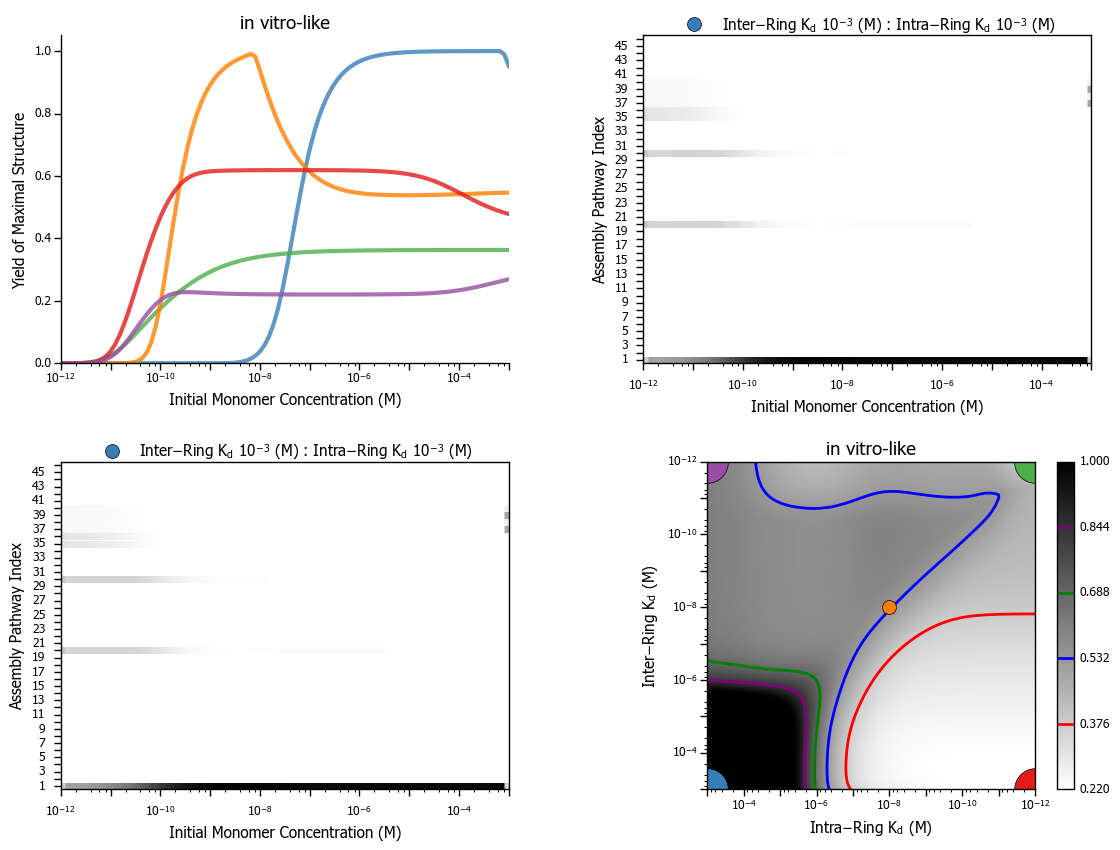

CPU times: user 6.1 s, sys: 133 ms, total: 6.23 s
Wall time: 6.35 s


In [20]:
%%time
import MPLGUI as MP
ClearAllFigs()
OverallMainPlot = MPLGPU(
    Blank=True,
#     hpad=0.1,
#     wpad=0.1,
#     FontSize = FontSize,
    Width=MP.inches2mm(6.5),
    subplot=321,
#     axes_aspect="equal",
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
#     rasterized=True,
    **Settings
)
Type = "Conc"
Class = "Asm"
DataSet = "WW"

AddGradLinePlot(OverallMainPlot, gs1[1,0], DataSet, Type=Type, Class=Class, **Settings)
# Class = "Species"
AddGradLinePlot(OverallMainPlot, gs1[0,1], DataSet, Type=Type, Class=Class, **Settings)
AddLineFracVs(OverallMainPlot, gs1[0,0], CDataSet, TimeOrConc = "Conc", **Settings)
# AddLineFracVs(OverallMainPlot, gs1[2,0], CDataSet, TimeOrConc = "Time", **Settings)
# AddColorBar(OverallMainPlot, 323, CDataSet, Class = Class, ShiftRight=0.35, **Settings)

CP = AddContour(
    OverallMainPlot,
    gs1[1,1],
    CDataSet,
    Width = MP.inches2mm(3.5),
    Aspect=1.0,
    axes_aspect="equal",
    ShiftRight = 0.025,
    **Settings
    )

# AddLineFracVs(OverallMainPlot, gs1[1,0], CDataSet, TimeOrConc = "Time",ShiftRight=1.5, **Settings)

print "Really Done"
plt.show()

[]


/home/vatir/anaconda3/envs/DataViewer27/lib/python2.7/site-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


Done
Done
Done
Done
Done
[0.22007612679324837, 0.99994085109669639]
[0.37604907165393797, 0.53202201651462755, 0.68799496137531713, 0.84396790623600682]
Done
Really Done


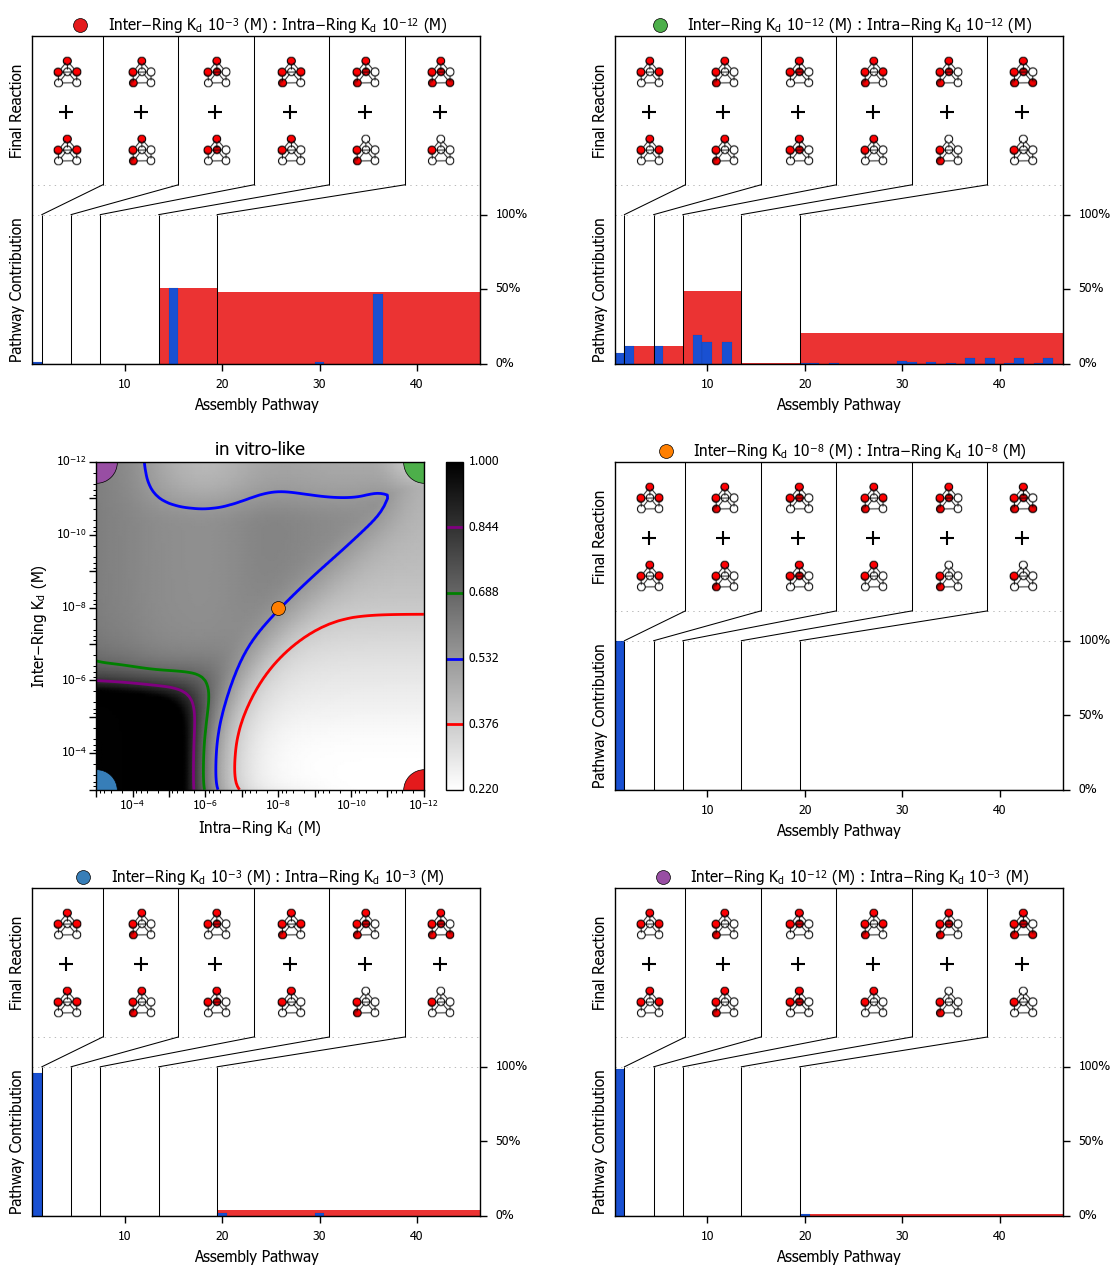

CPU times: user 15.3 s, sys: 270 ms, total: 15.6 s
Wall time: 15.7 s


In [21]:
%%time
ClearAllFigs()

# Settings = {"hpad": 0.3, "wpad": 0.2, "FontSize": FontSize}

Subplot = 321
OverallMainPlot = MPLGPU(
    Blank=True,
    Width=MP.inches2mm(6.5),
    subplot=321,
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)

gs1 = gridspec.GridSpec(nrows=3, ncols=2)#, left=0.05, right=0.48, wspace=0.05)

AddPlot(OverallMainPlot, gs1[0,0], "SW", **Settings)
AddPlot(OverallMainPlot, gs1[0,1], "SS", **Settings)
AddPlot(OverallMainPlot, gs1[1,1], "M", **Settings)
AddPlot(OverallMainPlot, gs1[2,0], "WW", **Settings)
AddPlot(OverallMainPlot, gs1[2,1], "WS", **Settings)

CP = AddContour(
    OverallMainPlot,
    gs1[1,0],
    CDataSet,
    Width = MP.inches2mm(3.5),
    Aspect=1.0,
    axes_aspect="equal",
    ShiftRight = 0.025,
    **Settings
    )

ImgFileName = "LargeHist-Multi-{}.pdf".format(CDataSet)
ImgFileName = "".join(ImgFileName.split())
OverallMainPlot.SaveFig(
    ImgFileName,
    bbox_inches = 'tight',
    antialiased=True
)
del OverallMainPlot

print "Really Done"

if ShowPlots:
    plt.show()

Conc - Asm

[]
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
Done
Done
Really Done


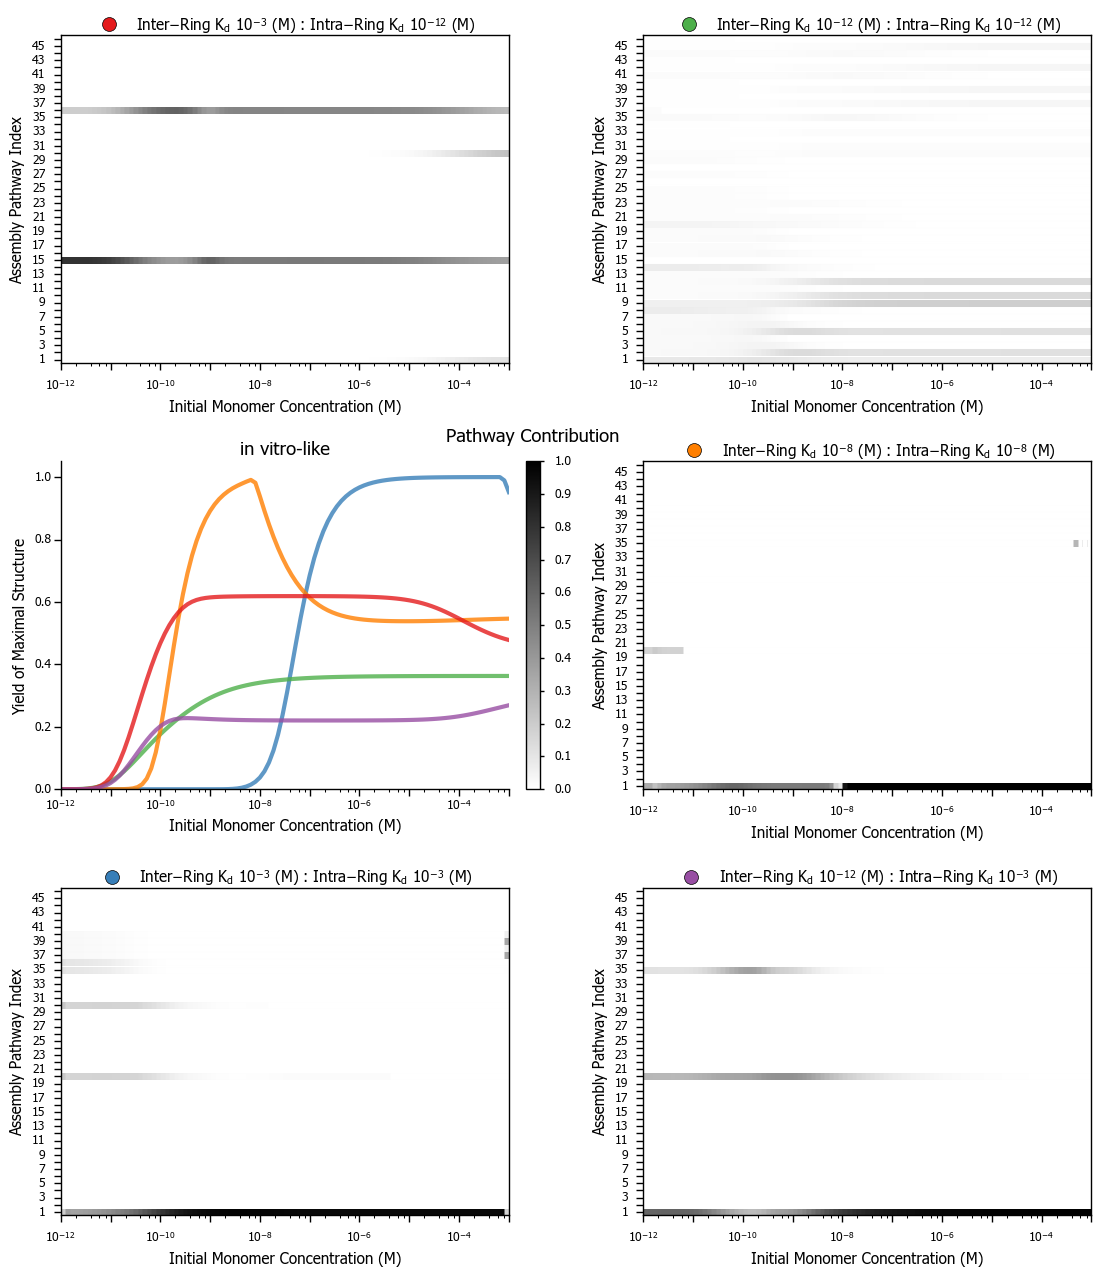

CPU times: user 20.5 s, sys: 486 ms, total: 21 s
Wall time: 21 s


In [22]:
%%time
ClearAllFigs()

OverallMainPlot = MPLGPU(
    Blank=True,
    Width=MP.inches2mm(6.5),
    subplot=321,
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)

Type = "Conc"
Class = "Asm"
AddGradLinePlot(OverallMainPlot, gs1[0,0], "SW", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[0,1], "SS", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[1,1], "M", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,0], "WW", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,1], "WS", Type=Type, Class=Class,  **Settings)
AddLineFracVs(OverallMainPlot, gs1[1,0], CDataSet, TimeOrConc = Type, **Settings)
AddColorBar(OverallMainPlot, 323, CDataSet, Class = Class, ShiftRight=0.35, **Settings)

ImgFileName = "{}-{}-Multi-{}.pdf".format(Type, Class, CDataSet)
ImgFileName = "".join(ImgFileName.split())
OverallMainPlot.SaveFig(
    ImgFileName,
    bbox_inches = 'tight',
    antialiased=True
)
print "Really Done"
if ShowPlots:
    plt.show()

Time - Asm

[]
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
Done
Done
Really Done


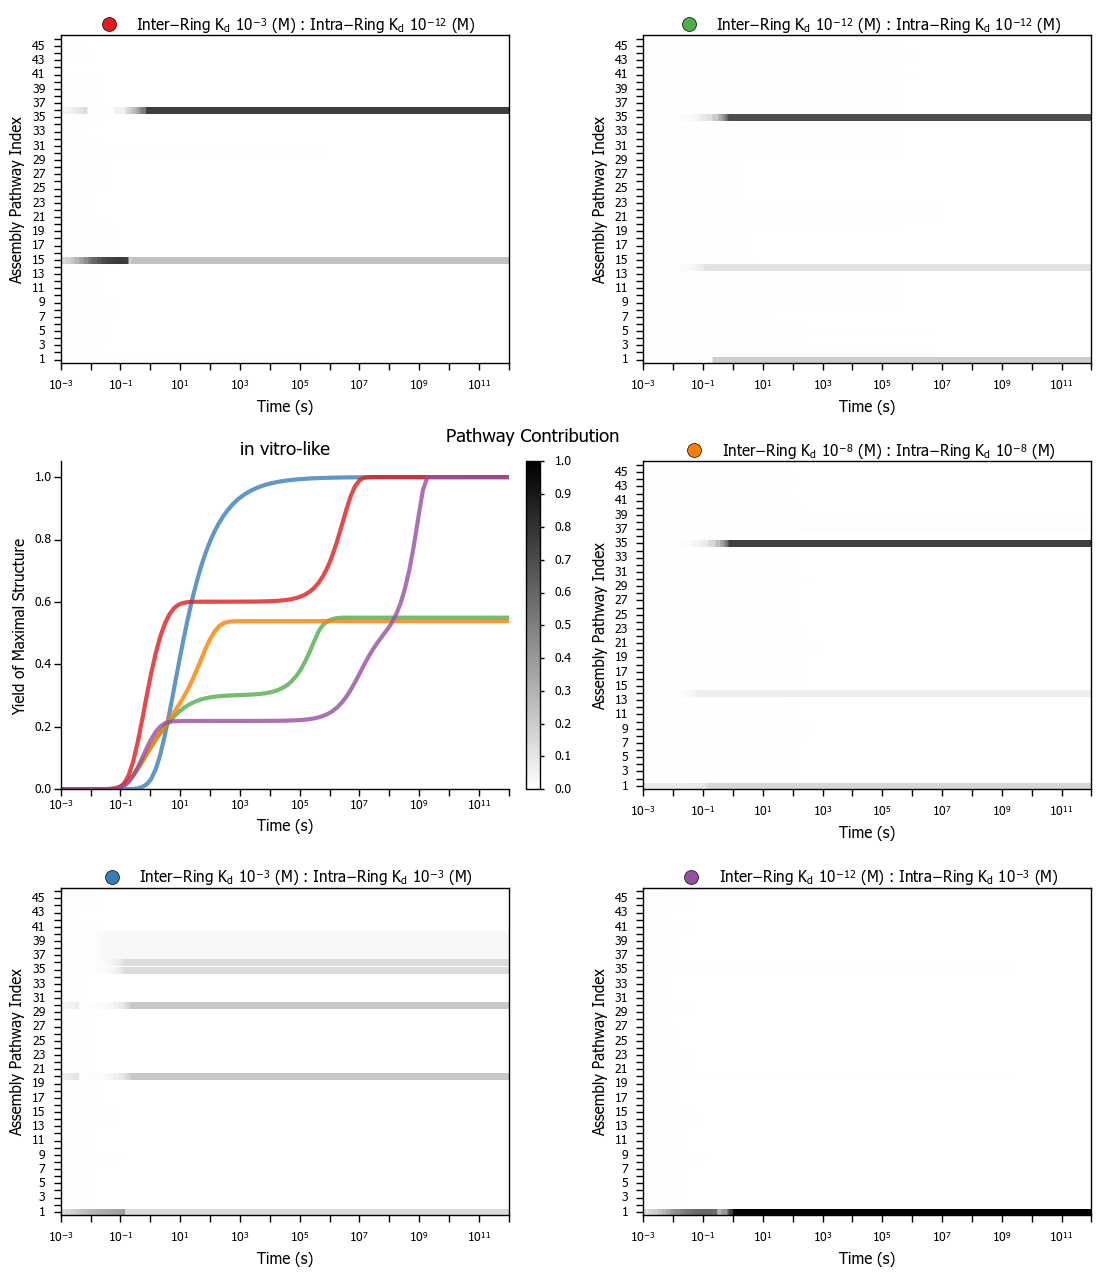

CPU times: user 21.7 s, sys: 439 ms, total: 22.1 s
Wall time: 22.1 s


In [23]:
%%time
ClearAllFigs()

OverallMainPlot = MPLGPU(
    Blank=True,
    Width=MP.inches2mm(6.5),
    subplot=321,
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)

Type = "Time"
Class = "Asm"
AddGradLinePlot(OverallMainPlot, gs1[0,0], "SW", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[0,1], "SS", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[1,1], "M", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,0], "WW", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,1], "WS", Type=Type, Class=Class,  **Settings)
AddLineFracVs(OverallMainPlot, gs1[1,0], CDataSet, TimeOrConc = Type, **Settings)
AddColorBar(OverallMainPlot, 323, CDataSet, Class = Class, ShiftRight=0.35, **Settings)

ImgFileName = "{}-{}-Multi-{}.pdf".format(Type, Class, CDataSet)
ImgFileName = "".join(ImgFileName.split())
OverallMainPlot.SaveFig(
    ImgFileName,
    bbox_inches = 'tight',
    antialiased=True
)
print "Really Done"
if ShowPlots:
    plt.show()

Conc - Species

[]
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
Done
Done
Really Done


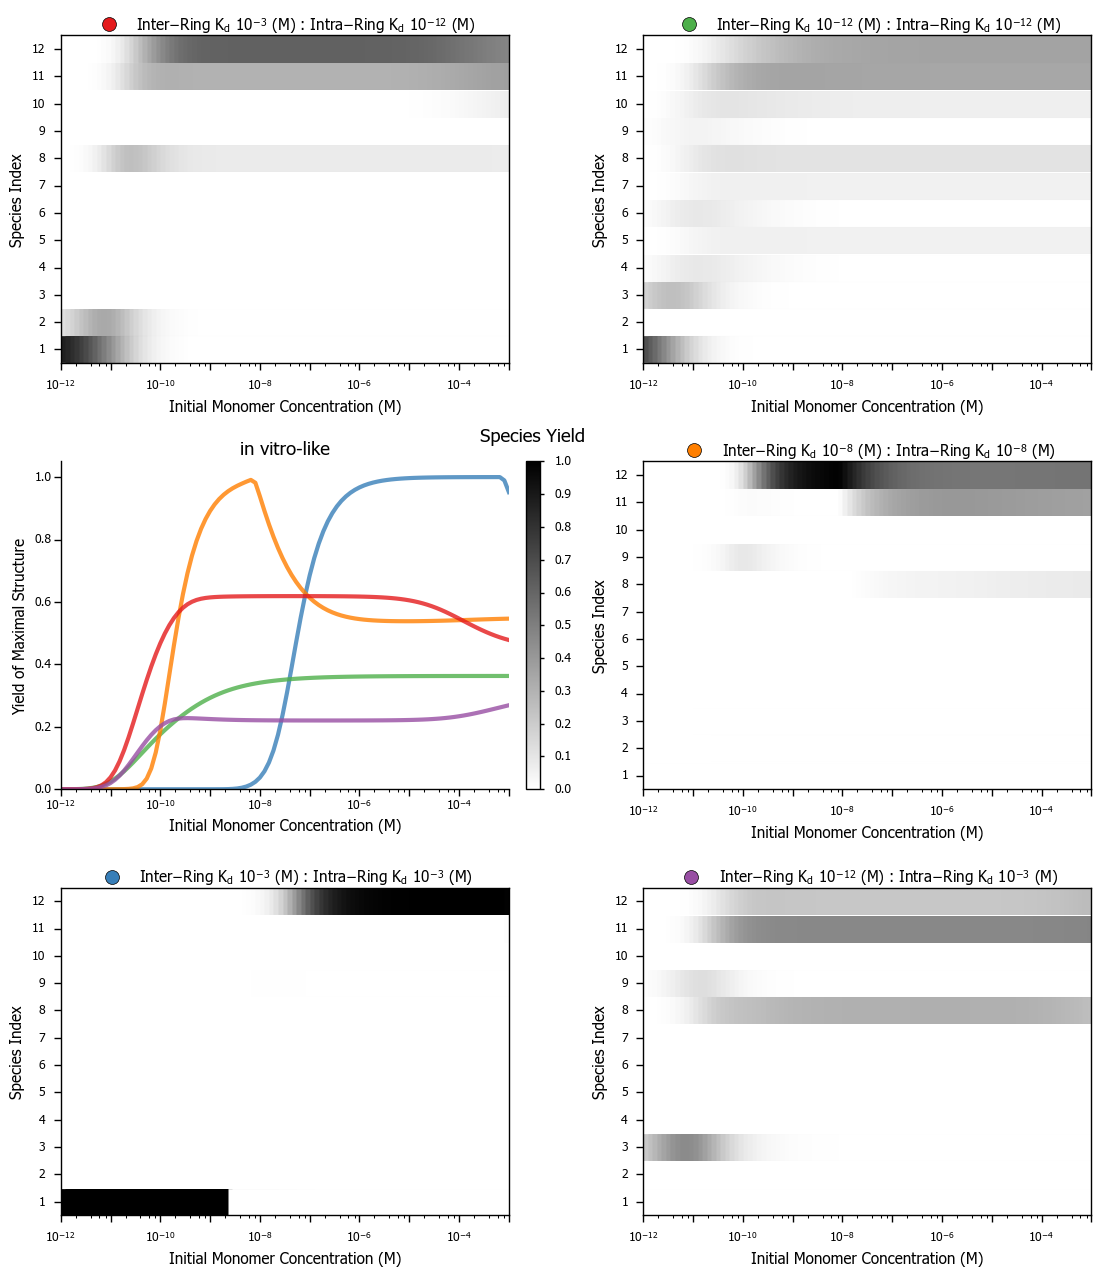

CPU times: user 10.8 s, sys: 395 ms, total: 11.2 s
Wall time: 11.2 s


In [24]:
%%time
ClearAllFigs()

OverallMainPlot = MPLGPU(
    Blank=True,
    Width=MP.inches2mm(6.5),
    subplot=321,
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)

Type = "Conc"
Class = "Species"
AddGradLinePlot(OverallMainPlot, gs1[0,0], "SW", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[0,1], "SS", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[1,1], "M", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,0], "WW", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,1], "WS", Type=Type, Class=Class,  **Settings)
AddLineFracVs(OverallMainPlot, gs1[1,0], CDataSet, TimeOrConc = Type, **Settings)
AddColorBar(OverallMainPlot, 323, CDataSet, Class = Class, ShiftRight=0.35, **Settings)

ImgFileName = "{}-{}-Multi-{}.pdf".format(Type, Class, CDataSet)
ImgFileName = "".join(ImgFileName.split())
OverallMainPlot.SaveFig(
    ImgFileName,
    bbox_inches = 'tight',
    antialiased=True
)
print "Really Done"
if ShowPlots:
    plt.show()

Time - Species

[]
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
Done
Done
Really Done


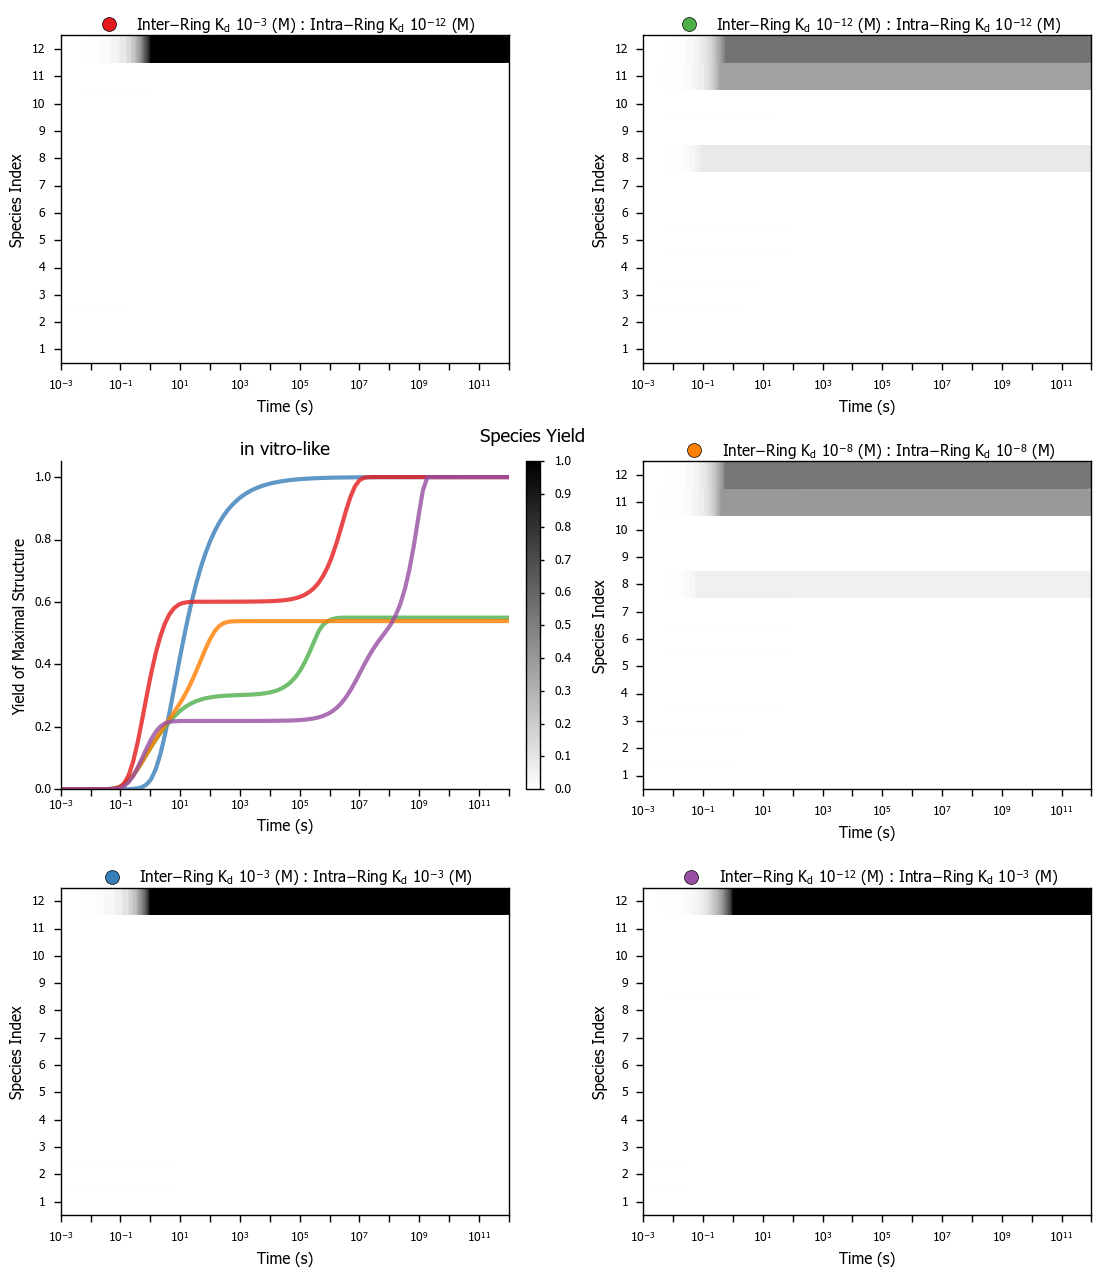

CPU times: user 10.4 s, sys: 483 ms, total: 10.9 s
Wall time: 10.9 s


In [25]:
%%time
ClearAllFigs()

OverallMainPlot = MPLGPU(
    Blank=True,
    Width=MP.inches2mm(6.5),
    subplot=321,
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)

Type = "Time"
Class = "Species"
AddGradLinePlot(OverallMainPlot, gs1[0,0], "SW", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[0,1], "SS", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[1,1], "M", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,0], "WW", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,1], "WS", Type=Type, Class=Class,  **Settings)
AddLineFracVs(OverallMainPlot, gs1[1,0], CDataSet, TimeOrConc = Type, **Settings)
AddColorBar(OverallMainPlot, 323, CDataSet, Class = Class, ShiftRight=0.35, **Settings)

ImgFileName = "{}-{}-Multi-{}.pdf".format(Type, Class, CDataSet)
ImgFileName = "".join(ImgFileName.split())
OverallMainPlot.SaveFig(
    ImgFileName,
    bbox_inches = 'tight',
    antialiased=True
)
print "Really Done"
if ShowPlots:
    plt.show()

Choose Data Set:

In [26]:
# DSName = "STV2StaticT"
DSName = "STV2SynDeg28e-04T"
ChangeDS(DSName)
# ChangeDS("STV2SynDeg28e-04T")
if "Static" in DSName:
    CDataSet = "in vitro-like"
else:
    CDataSet = "in vivo-like"

Working Name: STV2SynDeg28e-04T
Shape: (100, 100)
Errors: 0
HasData: 1344000000


Adjust Time Range

In [27]:
TimePoints = TimePoints[:TimeTarget+1]
FullOutArray = FullOutArray[:,:,:,:TimeTarget+1,:]

Hists with Contour

[]
Done
Done
Done
Done
Done
[0.86889434341331251, 0.98121877345141395]
[0.89135922942093282, 0.91382411542855313, 0.93628900143617333, 0.95875388744379364, 0.97, 0.975, 0.98]
Done
Really Done


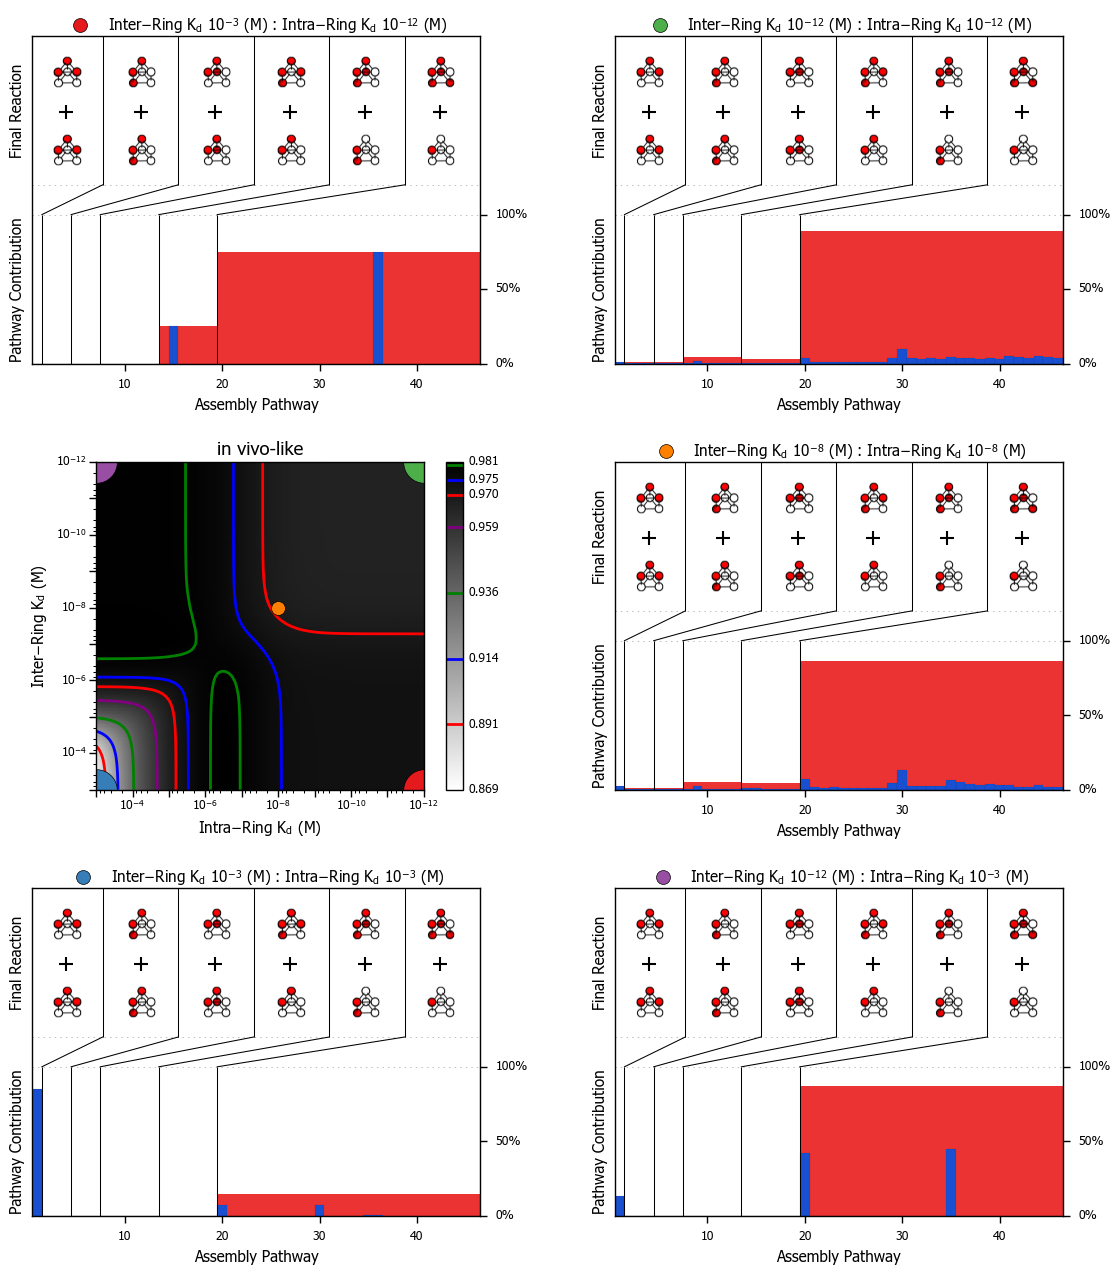

CPU times: user 17.2 s, sys: 1.03 s, total: 18.3 s
Wall time: 18.6 s


In [28]:
%%time
ClearAllFigs()

import MPLGUI as MP

# Settings = {"hpad": 0.3, "wpad": 0.2, "FontSize": FontSize}

Subplot = 321
OverallMainPlot = MPLGPU(
    Blank=True,
    Width=MP.inches2mm(6.5),
    subplot=321,
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)

gs1 = gridspec.GridSpec(nrows=3, ncols=2)#, left=0.05, right=0.48, wspace=0.05)

AddPlot(OverallMainPlot, gs1[0,0], "SW", **Settings)
AddPlot(OverallMainPlot, gs1[0,1], "SS", **Settings)
AddPlot(OverallMainPlot, gs1[1,1], "M", **Settings)
AddPlot(OverallMainPlot, gs1[2,0], "WW", **Settings)
AddPlot(OverallMainPlot, gs1[2,1], "WS", **Settings)

CP = AddContour(
    OverallMainPlot,
    gs1[1,0],
    CDataSet,
    Width = MP.inches2mm(3.5),
    Aspect=1.0,
    axes_aspect="equal",
    ShiftRight = 0.025,
    **Settings
    )

ImgFileName = "LargeHist-Multi-{}.pdf".format(CDataSet)
ImgFileName = "".join(ImgFileName.split())
OverallMainPlot.SaveFig(
    ImgFileName,
    bbox_inches = 'tight',
    antialiased=True
)
del OverallMainPlot

print "Really Done"

if ShowPlots:
    plt.show()

Conc - Asm

[]
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
Done
Done
Really Done


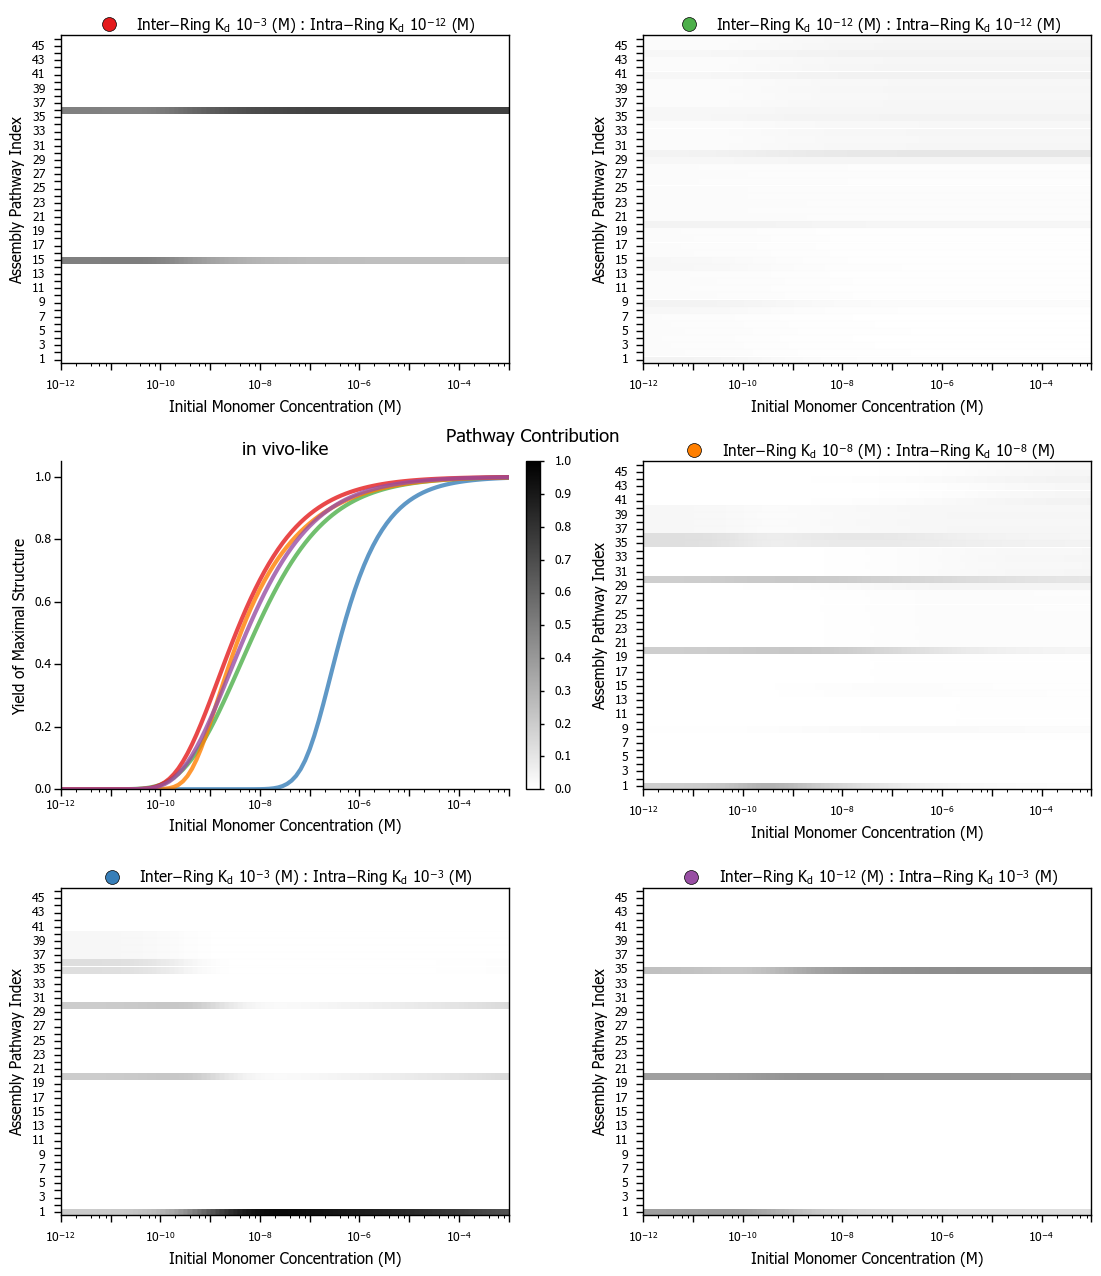

CPU times: user 22.8 s, sys: 407 ms, total: 23.2 s
Wall time: 23.3 s


In [29]:
%%time
ClearAllFigs()

OverallMainPlot = MPLGPU(
    Blank=True,
    Width=MP.inches2mm(6.5),
    subplot=321,
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)

Type = "Conc"
Class = "Asm"
AddGradLinePlot(OverallMainPlot, gs1[0,0], "SW", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[0,1], "SS", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[1,1], "M", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,0], "WW", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,1], "WS", Type=Type, Class=Class,  **Settings)
AddLineFracVs(OverallMainPlot, gs1[1,0], CDataSet, TimeOrConc = Type, **Settings)
AddColorBar(OverallMainPlot, 323, CDataSet, Class = Class, ShiftRight=0.35, **Settings)

ImgFileName = "{}-{}-Multi-{}.pdf".format(Type, Class, CDataSet)
ImgFileName = "".join(ImgFileName.split())
OverallMainPlot.SaveFig(
    ImgFileName,
    bbox_inches = 'tight',
    antialiased=True
)
print "Really Done"
if ShowPlots:
    plt.show()

Time - Asm

[]
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
[ 5.02755978]
Done: AddGradLinePlot
Done
Done
Really Done


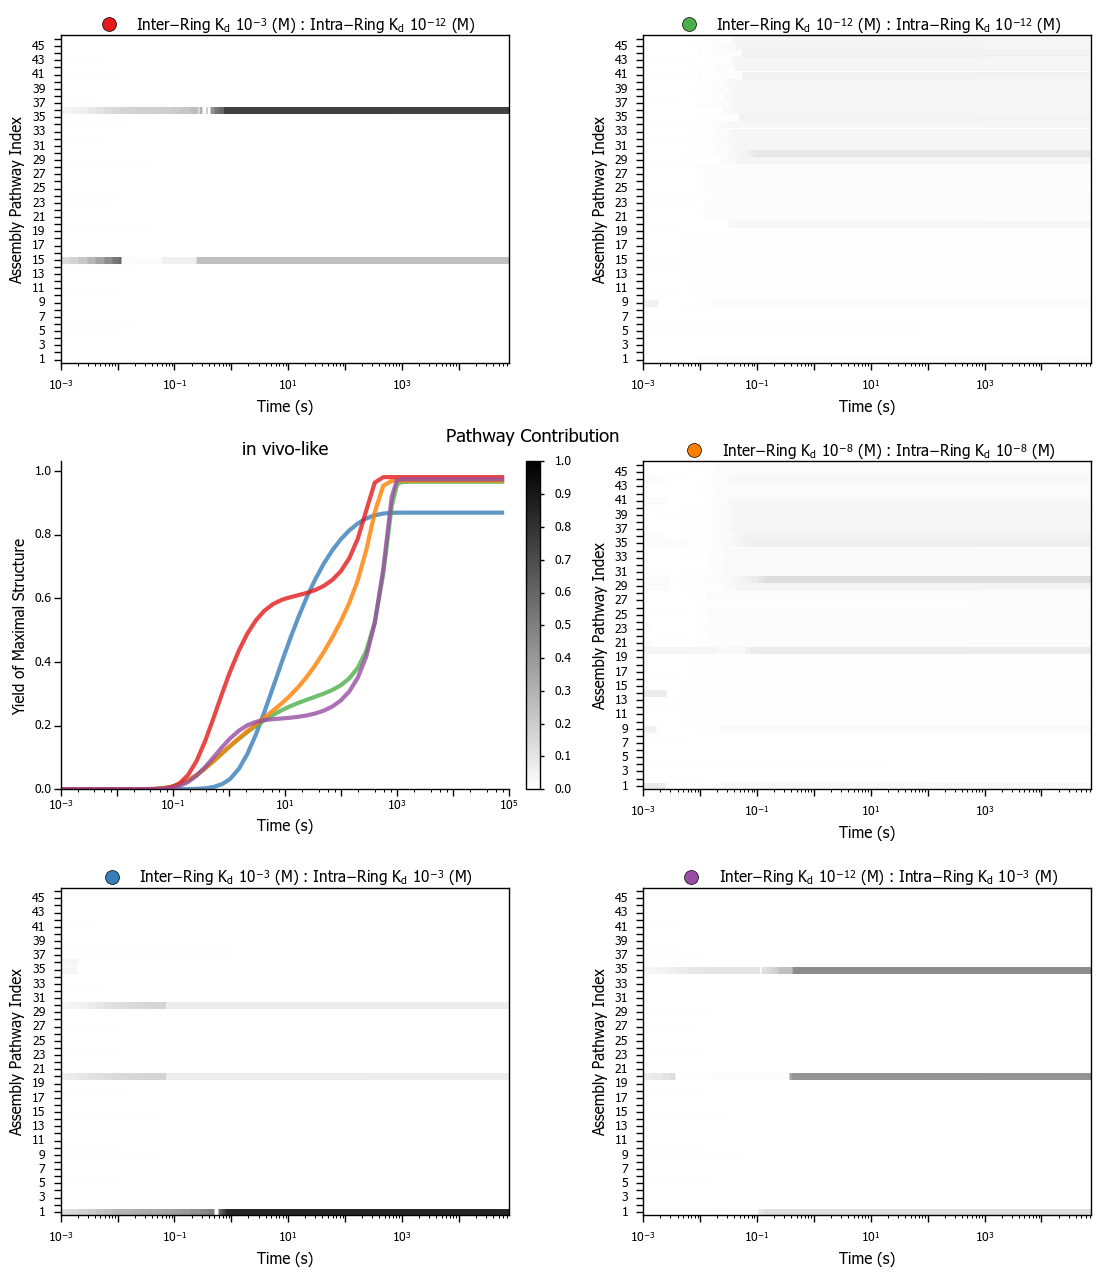

CPU times: user 17.9 s, sys: 359 ms, total: 18.2 s
Wall time: 18.2 s


In [30]:
%%time
ClearAllFigs()

OverallMainPlot = MPLGPU(
    Blank=True,
    Width=MP.inches2mm(6.5),
    subplot=321,
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)

Type = "Time"
Class = "Asm"
AddGradLinePlot(OverallMainPlot, gs1[0,0], "SW", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[0,1], "SS", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[1,1], "M", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,0], "WW", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,1], "WS", Type=Type, Class=Class,  **Settings)
AddLineFracVs(OverallMainPlot, gs1[1,0], CDataSet, TimeOrConc = Type, **Settings)
AddColorBar(OverallMainPlot, 323, CDataSet, Class = Class, ShiftRight=0.35, **Settings)

ImgFileName = "{}-{}-Multi-{}.pdf".format(Type, Class, CDataSet)
ImgFileName = "".join(ImgFileName.split())
OverallMainPlot.SaveFig(
    ImgFileName,
    bbox_inches = 'tight',
    antialiased=True
)
print "Really Done"
if ShowPlots:
    plt.show()

Conc - Species

[]
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
Done
Done
Really Done


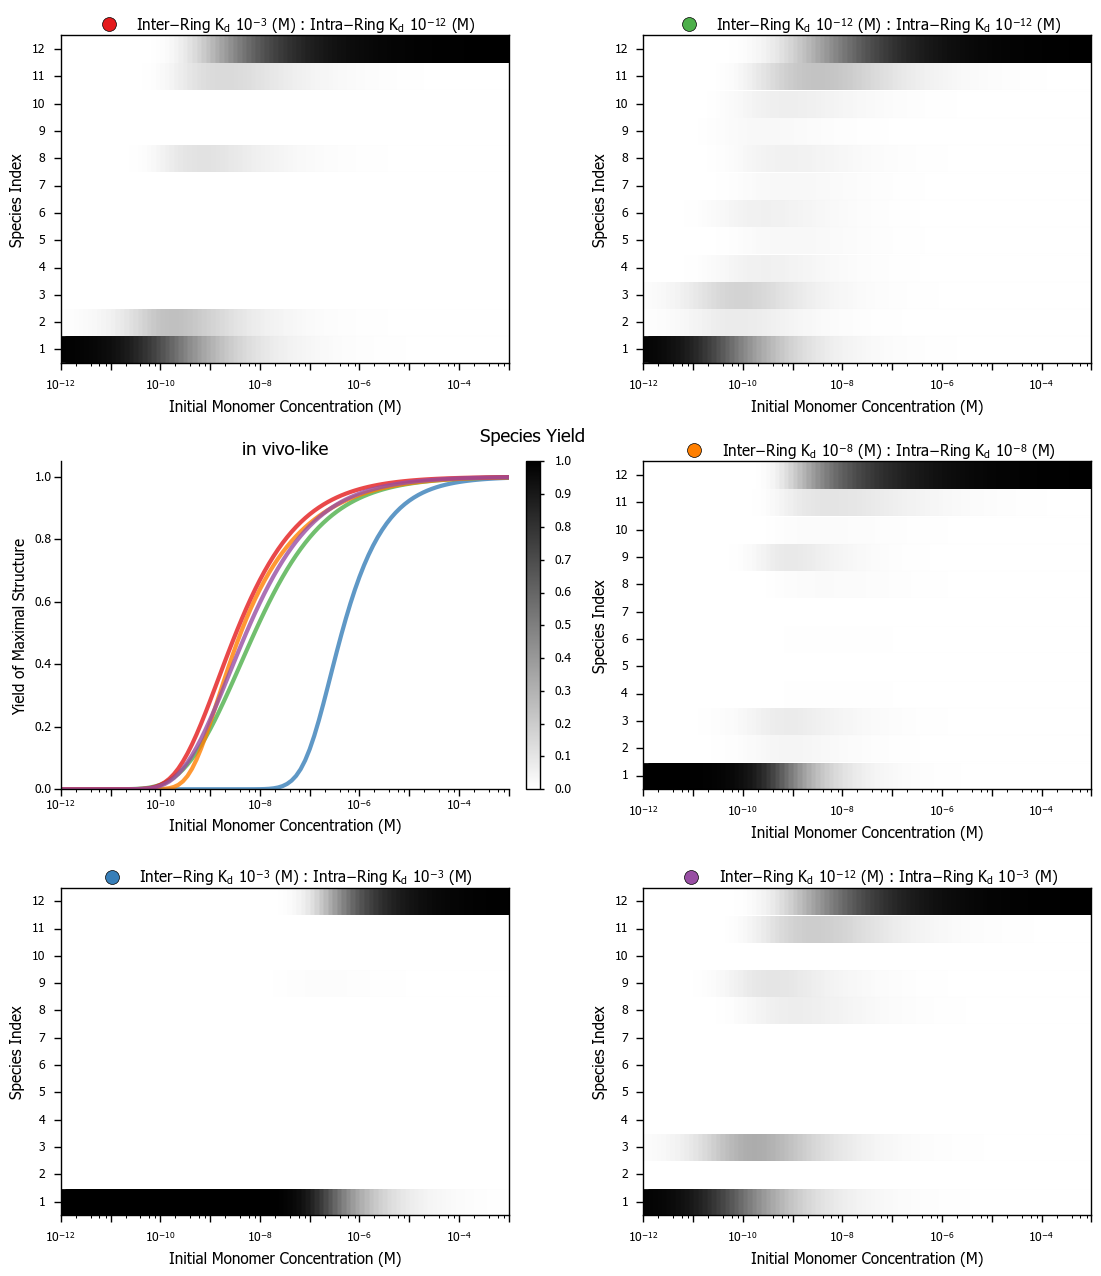

CPU times: user 10.7 s, sys: 353 ms, total: 11.1 s
Wall time: 11.1 s


In [31]:
%%time
ClearAllFigs()

OverallMainPlot = MPLGPU(
    Blank=True,
    Width=MP.inches2mm(6.5),
    subplot=321,
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)

Type = "Conc"
Class = "Species"
AddGradLinePlot(OverallMainPlot, gs1[0,0], "SW", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[0,1], "SS", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[1,1], "M", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,0], "WW", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,1], "WS", Type=Type, Class=Class,  **Settings)
AddLineFracVs(OverallMainPlot, gs1[1,0], CDataSet, TimeOrConc = Type, **Settings)
AddColorBar(OverallMainPlot, 323, CDataSet, Class = Class, ShiftRight=0.35, **Settings)

ImgFileName = "{}-{}-Multi-{}.pdf".format(Type, Class, CDataSet)
ImgFileName = "".join(ImgFileName.split())
OverallMainPlot.SaveFig(
    ImgFileName,
    bbox_inches = 'tight',
    antialiased=True
)
print "Really Done"
if ShowPlots:
    plt.show()

Time - Species

[]
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
[ 19.2723125]
Done: AddGradLinePlot
Done
Done
Really Done


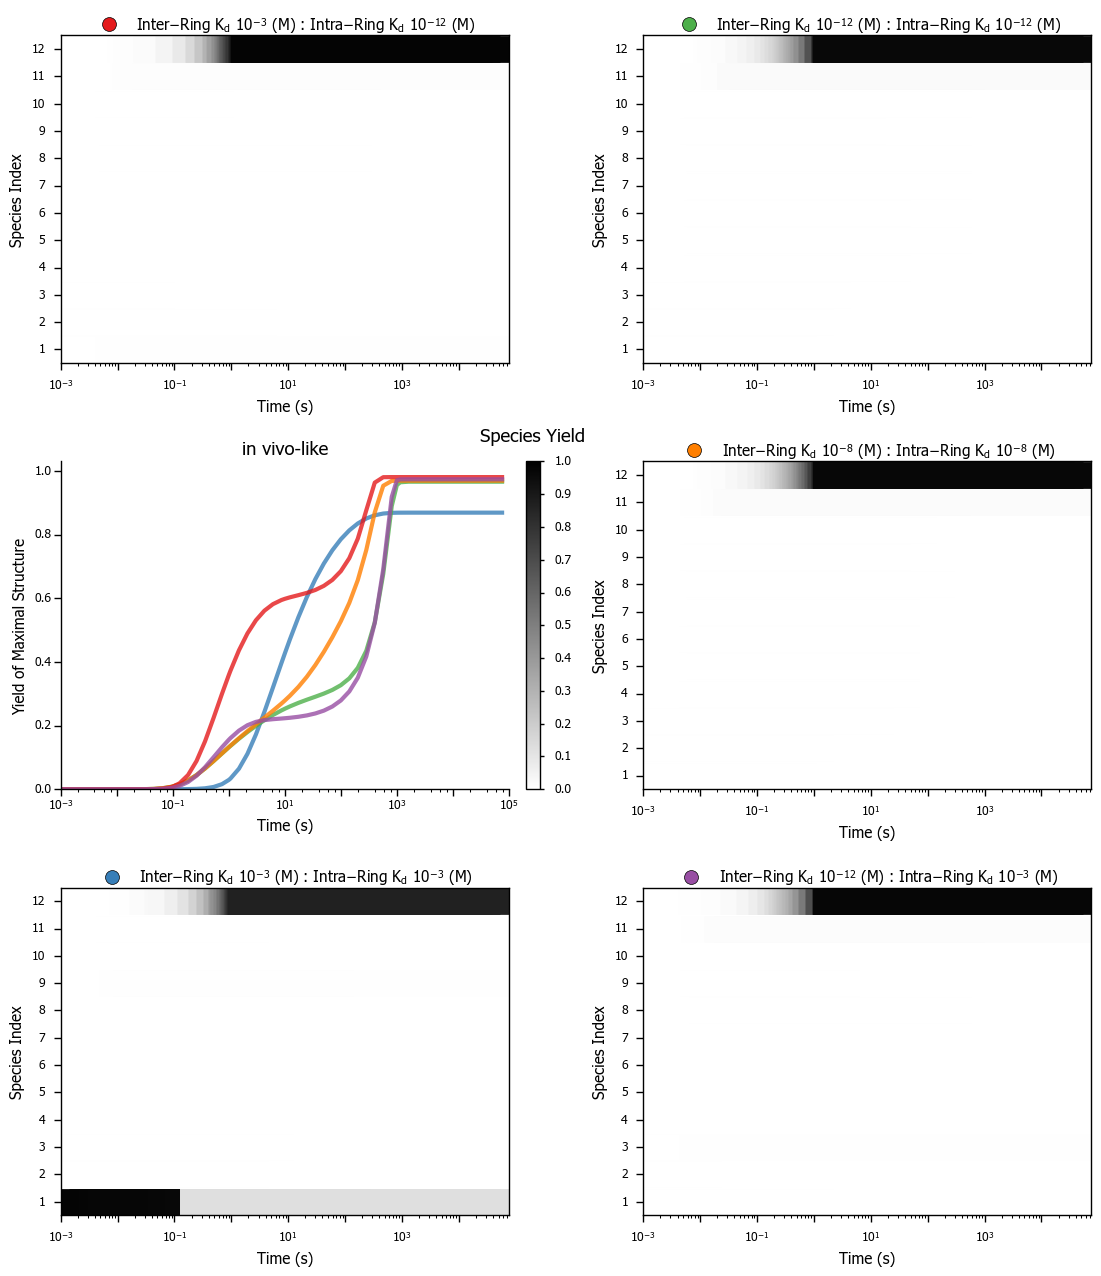

CPU times: user 9.85 s, sys: 326 ms, total: 10.2 s
Wall time: 10.2 s


In [32]:
%%time
ClearAllFigs()

OverallMainPlot = MPLGPU(
    Blank=True,
    Width=MP.inches2mm(6.5),
    subplot=321,
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)

Type = "Time"
Class = "Species"
AddGradLinePlot(OverallMainPlot, gs1[0,0], "SW", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[0,1], "SS", Type=Type, Class=Class, **Settings)
AddGradLinePlot(OverallMainPlot, gs1[1,1], "M", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,0], "WW", Type=Type, Class=Class,  **Settings)
AddGradLinePlot(OverallMainPlot, gs1[2,1], "WS", Type=Type, Class=Class,  **Settings)
AddLineFracVs(OverallMainPlot, gs1[1,0], CDataSet, TimeOrConc = Type, **Settings)
AddColorBar(OverallMainPlot, 323, CDataSet, Class = Class, ShiftRight=0.35, **Settings)

ImgFileName = "{}-{}-Multi-{}.pdf".format(Type, Class, CDataSet)
ImgFileName = "".join(ImgFileName.split())
OverallMainPlot.SaveFig(
    ImgFileName,
    bbox_inches = 'tight',
    antialiased=True
)
print "Really Done"
if ShowPlots:
    plt.show()